# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# YouTube data extraction

At first, I wanted to analyze all PS5 and Xbox tweets in September as many announcements occured that month (price, games, etc.). But it was too difficult for me to get the Twitter data. The API limitations only let me have access to the last 7 days of data. I also had a look at the scrapers (Twint, tweetscraper, GetOldTweets3, etc.) but they were all down for some reasons...
Therefore, I decided to change a bit the scope of the project.

I will have a look at the YouTube comments of both PS5 and Xbox games showcases.
The PS5 showcase occured on the 16th of September while the Xbox Series X showcase occured on the 23rd of July.

For Xbox and PS5 data, I  used a website called Coberry to get the data from YouTube comments.
I wanted to use Selenium to scrape the data myself but I did not manage to collect the entire set of comments. The scraper was stopping at 450-500 comments... I will investigate in more details web scrapers in one of my next projects.

### Xbox

In [2]:
Xbox_data = pd.read_csv('Xbox_all_comments.txt',sep='delimiter',header=None)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
#Isolate comments
Xbox_data['Date']=Xbox_data[0].apply(lambda x: x[:11])
Xbox_data['Hour']=Xbox_data[0].apply(lambda x: x[11:19])
Xbox_data['Text']=Xbox_data[0].apply(lambda x: x[21:])
Xbox_data.drop(0,axis=1,inplace=True)

In [4]:
Xbox_data

,Date,Hour,Text
0,2020-07-23,16:59:51,First
1,2020-07-23,16:59:55,bad
2,2020-07-23,16:59:56,First
3,2020-07-23,16:59:58,First comment
4,2020-07-23,17:00:02,Hello
...,...,...,...
2476,2020-10-16,13:13:02,i really loved the thoughtful content Aced th...
2477,2020-10-18,16:50:35,3:10
2478,2020-10-20,05:06:57,Master chief sounds like Batman ??
2479,2020-10-20,15:22:31,Rip Xbox


### PS5

In [5]:
PS5_data = pd.read_csv('PS5_all_comments.txt',sep='delimiter',header=None)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
PS5_data

,0
0,2020-09-16 20:53:34: Hello
1,2020-09-16 20:53:38: HYPED
2,2020-09-16 20:53:40: Hi
3,2020-09-16 20:53:41:
4,2020-09-16 20:53:42: LETS GOOO
...,...
7687,2020-10-26 13:31:23: > @Shikikan -sama wow wai...
7688,2020-10-26 18:08:59: El final me animo mas a s...
7689,2020-10-27 13:50:52: I cried due to 18+ live
7690,2020-10-27 16:01:35: I hope it doesnt shove it...


In [7]:
#Isolate comments
PS5_data['Date']=PS5_data[0].apply(lambda x: x[:11])
PS5_data['Hour']=PS5_data[0].apply(lambda x: x[11:19])
PS5_data['Text']=PS5_data[0].apply(lambda x: x[21:])
PS5_data.drop(0,axis=1,inplace=True)

In [8]:
PS5_data

,Date,Hour,Text
0,2020-09-16,20:53:34,Hello
1,2020-09-16,20:53:38,HYPED
2,2020-09-16,20:53:40,Hi
3,2020-09-16,20:53:41,
4,2020-09-16,20:53:42,LETS GOOO
...,...,...,...
7687,2020-10-26,13:31:23,> @Shikikan -sama wow wait8ng for christmas gift
7688,2020-10-26,18:08:59,El final me animo mas a sobrevivir al 2020
7689,2020-10-27,13:50:52,I cried due to 18+ live
7690,2020-10-27,16:01:35,I hope it doesnt shove it your face that you n...


# Text processing

### Xbox

In [9]:
import nltk
import re

In [10]:
#Creating a function to clean the comments
def clean_text(text):
    text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyperlinks
    text = re.sub(r"\d{2}:\d{2}s*", '', text) #Removing timestamps XX:XX
    text = re.sub(r"\d{1}:\d{2}s*", '', text) #Removing timestamps X:XX
    text = re.sub('[^A-Za-z0-9 ]+', '', text) #Removing special characters
    return text

In [11]:
Xbox_data['Text']=Xbox_data['Text'].apply(clean_text)

In [12]:
Xbox_data.head()

,Date,Hour,Text
0,2020-07-23,16:59:51,First
1,2020-07-23,16:59:55,bad
2,2020-07-23,16:59:56,First
3,2020-07-23,16:59:58,First comment
4,2020-07-23,17:00:02,Hello


I decide to remove all game names from our analysis. I noticed later that some games have a negative impact on sentiment detection (ex. State of Decay 3, "decay" is a negative word). I will also add some games that are not specific to the showcase but that are still widely mentioned and that could impact our sentiment detection.

In [13]:
Xbox_games_dict = {'Halo':'Halo Infinite, Halo',
                  'State of Decay 3':'State of Decay 3, State of Decay, SOD, SOD3',
                  'Forza Motorsport':'Forza Motorsport, Forza, Motorsport',
                  'Everwild':'Everwild, Ever wild',
                  'Tell Me Why':'Tell Me Why, TMW',
                  'Outer Worlds: Peril on Gorgon':'Outer Worlds Peril on Gorgon, Outer Worlds, Peril on Gorgon, OWPG',
                  'Grounded':'Grounded',
                  'Avowed':'Avowed',
                  'As Dusk Falls':'As Dusk Falls, Dusk Falls, Dusk',
                  'Hellblade 2':'Hellblade 2, Hellblade, Hell blade, Senua\'s Saga Hellblade 2, Senua\'s Saga Hellblade, Senua\'s Saga, Senuas Saga Hellblade, Senuas Saga',
                  'Psychonauts 2':'Psychonauts 2, Psychonauts, Pyschonauts',
                  'S.T.A.L.K.E.R. 2':'S.T.A.L.K.E.R. 2, Stalker 2, Stalker',
                  'Warhammer 40,000: Darktide':'Warhammer 40000 Darktide, Warhammer, War hammer',
                  'The Gunk':'The Gunk, Gunk',
                  'The Medium':'The Medium',
                  'Phantasy Star Online 2 New Genesis':'Phantasy Star Online 2 New Genesis, Phantasy Star, New Genesis, PSONG, PSO2, PSO2NG',
                  'Crossfire X':'Crossfire X, Crossfire, Cross fire, CrossfireX',
                  'Fable 4':'Fable 4, Fable IV, Fable',
                  'Gears of War':'Gears of War 5, Gears of War, Gears 5, Gears, GoW5, GoW'}

In [14]:
Xbox_games_remove = []
for i in list(Xbox_games_dict):
    Xbox_games_remove.append(Xbox_games_dict[i].split(', '))

In [15]:
Xbox_games_remove_final = []

In [16]:
def remove_nestings(l): 
    for i in l: 
        if type(i) == list: 
            remove_nestings(i) 
        else: 
            Xbox_games_remove_final.append(i.lower()) 

In [17]:
remove_nestings(Xbox_games_remove)

In [18]:
Xbox_games_remove_final

['halo infinite',
 'halo',
 'state of decay 3',
 'state of decay',
 'sod',
 'sod3',
 'forza motorsport',
 'forza',
 'motorsport',
 'everwild',
 'ever wild',
 'tell me why',
 'tmw',
 'outer worlds peril on gorgon',
 'outer worlds',
 'peril on gorgon',
 'owpg',
 'grounded',
 'avowed',
 'as dusk falls',
 'dusk falls',
 'dusk',
 'hellblade 2',
 'hellblade',
 'hell blade',
 "senua's saga hellblade 2",
 "senua's saga hellblade",
 "senua's saga",
 'senuas saga hellblade',
 'senuas saga',
 'psychonauts 2',
 'psychonauts',
 'pyschonauts',
 's.t.a.l.k.e.r. 2',
 'stalker 2',
 'stalker',
 'warhammer 40000 darktide',
 'warhammer',
 'war hammer',
 'the gunk',
 'gunk',
 'the medium',
 'phantasy star online 2 new genesis',
 'phantasy star',
 'new genesis',
 'psong',
 'pso2',
 'pso2ng',
 'crossfire x',
 'crossfire',
 'cross fire',
 'crossfirex',
 'fable 4',
 'fable iv',
 'fable',
 'gears of war 5',
 'gears of war',
 'gears 5',
 'gears',
 'gow5',
 'gow']

In [19]:
Xbox_data['Text with games'] = Xbox_data['Text']

In [20]:
for i in range(0,len(Xbox_data)):
    exclusions = '|'.join(Xbox_games_remove_final)
    Xbox_data['Text'].loc[i] = re.sub(exclusions, '', Xbox_data['Text'].loc[i].lower())

In [21]:
Xbox_data.head()

,Date,Hour,Text,Text with games
0,2020-07-23,16:59:51,first,First
1,2020-07-23,16:59:55,bad,bad
2,2020-07-23,16:59:56,first,First
3,2020-07-23,16:59:58,first comment,First comment
4,2020-07-23,17:00:02,hello,Hello


### PS5

In [22]:
PS5_data['Text']=PS5_data['Text'].apply(clean_text)

In [23]:
PS5_data

,Date,Hour,Text
0,2020-09-16,20:53:34,Hello
1,2020-09-16,20:53:38,HYPED
2,2020-09-16,20:53:40,Hi
3,2020-09-16,20:53:41,
4,2020-09-16,20:53:42,LETS GOOO
...,...,...,...
7687,2020-10-26,13:31:23,Shikikan sama wow wait8ng for christmas gift
7688,2020-10-26,18:08:59,El final me animo mas a sobrevivir al 2020
7689,2020-10-27,13:50:52,I cried due to 18 live
7690,2020-10-27,16:01:35,I hope it doesnt shove it your face that you n...


In [24]:
PS5_games_dict = {'Final Fantasy XVI':'Final Fantasy XVI, Final Fantasy 16, Final Fantasy, FF16, FF 16, FFXVI, FF XVI',
                 'Spider-Man Miles Morales':'Spider-Man Miles Morales, Spiderman Miles Morales, Spider man Miles Morales, Spiderman, Spider man, Miles Morales, Spiderman MM',
                 'Hogwarts Legacy':'Hogwarts Legacy, HP Hogwarts Legacy, HP Hogwarts, Harry Potter, HPHL, HP HL, Hogwarts, Harrypotter, Potter',
                 'Call of Duty Black Ops Cold War':'Call of Duty Black Ops Cold War, Call of Duty, Black Ops Cold War, Black Ops, Cold War, COD BO CW, COD BO, COD',
                 'Resident Evil Village':'Resident Evil Village, Resident Evil, RE Village, Village',
                 'Death Loop':'Death Loop, Deathloop',
                 'Devil May Cry 5':'Devil May Cry 5 Special Edition, Devil May Cry 5, Devil May Cry, Devilmaycry, DMC5, DMC5 SE',
                 'Oddworld Soulstorm':'Oddworld Soulstorm, Oddworld Soul Storm, Oddworld Soul System, Odd World Soul System, Soulstorm, Soul Storm, Oddworld, Odd world',
                 'Five Nights at Freddys Security Breach':'Five Nights at Freddy\'s Security Breach, Five Nights at Freddy\'s, Freddy\'s Security Breach, Five Nights at Freddys Security Breach, Five Nights at Freddys, Freddys Security Breach, Freddy, FNFSB',
                 'Demons Souls':'Demon\'s Souls, Demon\'s Soul, Demons Souls, Demon Souls, Demon Soul, Demons Soul',
                 'Fortnite':'Fortnite',
                 'Ragnarok':'God Of War Ragnarok, GoW Ragnarok, Ragnarok, God of War, GoW, GoWR',
                 'Horizon':'Horizon Zero Dawn, Horizon Forbidden West, Horizon Forbidden, Horizon'}

In [25]:
PS5_games_remove = []
for i in list(PS5_games_dict):
    PS5_games_remove.append(PS5_games_dict[i].split(', '))

In [26]:
PS5_games_remove_final = []

In [27]:
def remove_nestings(l): 
    for i in l: 
        if type(i) == list: 
            remove_nestings(i) 
        else: 
            PS5_games_remove_final.append(i.lower()) 

In [28]:
remove_nestings(PS5_games_remove)

In [29]:
PS5_games_remove_final

['final fantasy xvi',
 'final fantasy 16',
 'final fantasy',
 'ff16',
 'ff 16',
 'ffxvi',
 'ff xvi',
 'spider-man miles morales',
 'spiderman miles morales',
 'spider man miles morales',
 'spiderman',
 'spider man',
 'miles morales',
 'spiderman mm',
 'hogwarts legacy',
 'hp hogwarts legacy',
 'hp hogwarts',
 'harry potter',
 'hphl',
 'hp hl',
 'hogwarts',
 'harrypotter',
 'potter',
 'call of duty black ops cold war',
 'call of duty',
 'black ops cold war',
 'black ops',
 'cold war',
 'cod bo cw',
 'cod bo',
 'cod',
 'resident evil village',
 'resident evil',
 're village',
 'village',
 'death loop',
 'deathloop',
 'devil may cry 5 special edition',
 'devil may cry 5',
 'devil may cry',
 'devilmaycry',
 'dmc5',
 'dmc5 se',
 'oddworld soulstorm',
 'oddworld soul storm',
 'oddworld soul system',
 'odd world soul system',
 'soulstorm',
 'soul storm',
 'oddworld',
 'odd world',
 "five nights at freddy's security breach",
 "five nights at freddy's",
 "freddy's security breach",
 'five night

In [30]:
PS5_data['Text with games'] = PS5_data['Text']

In [31]:
for i in range(0,len(PS5_data)):
    exclusions = '|'.join(PS5_games_remove_final)
    PS5_data['Text'].loc[i] = re.sub(exclusions, '', PS5_data['Text'].loc[i].lower())

In [32]:
PS5_data.head()

,Date,Hour,Text,Text with games
0,2020-09-16,20:53:34,hello,Hello
1,2020-09-16,20:53:38,hyped,HYPED
2,2020-09-16,20:53:40,hi,Hi
3,2020-09-16,20:53:41,,
4,2020-09-16,20:53:42,lets gooo,LETS GOOO


# Tokenizer / Part-of-Speech tagging / Lemmatizer / Stop words removal

Below, a lot of steps are performed in one-go that I will explain in more details.
This website helped me a lot to understand this process:
https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

My goal is to clean the comments so that words are standardized for the word clouds and sentiment analysis.

- First I tokenize the comments, this means that each word in a sentence is isolated 
          Example: "I ate these fruits." => [I, ate, these, fruits]
- Then, I perform part-of-speech (POS) tagging which goal is to classify isolated words by their type (nouns, verbs...) and add some context to the sentence
          Example: [I, ate, these, fruits] => [('I', 'PRP'), ('ate', 'VBP'), ('these', 'DT'), ('fruits', 'NNS')]
- Then, I lemmatize these words. That means that all words are brought back to their root form. The previous step helps the lemmatizer to perform better.
          Example: [('I', 'PRP'), ('ate', 'VBP'), ('these', 'DT'), ('fruits', 'NNS')] => [I, eat, these, fruit]
- Eventually, I remove all the stop words in order to keep only essential words in the sentence.
          Example: [I, eat, these, fruit] => [eat, fruit]

I also tried to implement a TextBlob spelling correction but it messed up with all game names... 'Tetris' became 'Debris', 'Fable' became 'Table'...

### Xbox

In [33]:
from nltk.corpus import wordnet
from nltk import pos_tag

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [34]:
#We need to install the "stopwords" corpus in order to remove the stopwords
#nltk.download()

In [35]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

lm = WordNetLemmatizer()

Xbox_data['Text clean'] = ""
for i in range(0,len(Xbox_data)):
    Xbox_data['Text clean'].loc[i] = [lm.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(Xbox_data['Text'].loc[i])]
    Xbox_data['Text clean'].loc[i] = [word for word in Xbox_data['Text clean'].loc[i] if word.lower() not in stopwords.words('english')]
    Xbox_data['Text clean'].loc[i] = " ".join(Xbox_data['Text clean'].loc[i])

In [36]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean
0,2020-07-23,16:59:51,first,First,first
1,2020-07-23,16:59:55,bad,bad,bad
2,2020-07-23,16:59:56,first,First,first
3,2020-07-23,16:59:58,first comment,First comment,first comment
4,2020-07-23,17:00:02,hello,Hello,hello


### PS5

In [37]:
lm = WordNetLemmatizer()

PS5_data['Text clean'] = ""
for i in range(0,len(PS5_data)):
    PS5_data['Text clean'].loc[i] = [lm.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(PS5_data['Text'].loc[i])]
    PS5_data['Text clean'].loc[i] = [word for word in PS5_data['Text clean'].loc[i] if word.lower() not in stopwords.words('english')]
    PS5_data['Text clean'].loc[i] = " ".join(PS5_data['Text clean'].loc[i])

In [38]:
PS5_data.head()

,Date,Hour,Text,Text with games,Text clean
0,2020-09-16,20:53:34,hello,Hello,hello
1,2020-09-16,20:53:38,hyped,HYPED,hyped
2,2020-09-16,20:53:40,hi,Hi,hi
3,2020-09-16,20:53:41,,,
4,2020-09-16,20:53:42,lets gooo,LETS GOOO,let gooo


# Word cloud

### Xbox

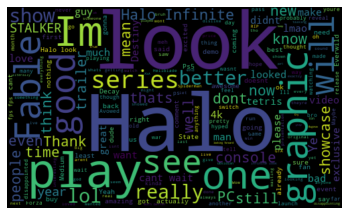

In [126]:
#Creating a word cloud
from wordcloud import WordCloud

word='ps5|Xbox|PS5|XBOX|xbox|Playstation|playstation|game|games|Sony|sony|Microsoft|microsoft'
full_text = ' '.join([txt for txt in Xbox_data['Text with games']])
full_text = re.sub(word,'',full_text)

wordcloud = WordCloud(width=500, height=300, max_font_size=119).generate(full_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### PS5

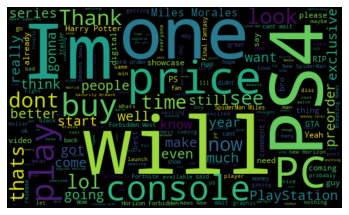

In [127]:
#Creating a word cloud
from wordcloud import WordCloud

word='ps5|Xbox|PS5|XBOX|xbox|Playstation|playstation|game|games|Sony|sony|Microsoft|microsoft'
full_text = ' '.join([txt for txt in PS5_data['Text with games']])
full_text = re.sub(word,'',full_text)

wordcloud = WordCloud(width=500, height=300, max_font_size=119).generate(full_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis

In this part, I will perform sentiment analysis to determine whether a comment is positive, neutral or negative.
I will use two different libraries: TextBlob and VADER.

I will perform the analysis on both "Text" and "Text clean" to see if the libraries perform better on the raw text or on the text with extra cleaning steps (POS, lemmatization, stop words removal etc.).
I will also try to determine the best library on this dataset.

These two articles helped me in this process:

https://towardsdatascience.com/sentiment-analysis-vader-or-textblob-ff25514ac540

https://medium.com/analytics-vidhya/textblob-the-nlp-preprocessing-godsend-1b404c35732e

### Xbox

#### *First approach: TextBlob*

In [41]:
from textblob import TextBlob

In [42]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean
0,2020-07-23,16:59:51,first,First,first
1,2020-07-23,16:59:55,bad,bad,bad
2,2020-07-23,16:59:56,first,First,first
3,2020-07-23,16:59:58,first comment,First comment,first comment
4,2020-07-23,17:00:02,hello,Hello,hello


In [43]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [44]:
Xbox_data['Polarity - TTB'] = Xbox_data['Text'].apply(get_polarity)
Xbox_data['Subjectivity - TTB'] = Xbox_data['Text'].apply(get_subjectivity)

Xbox_data['Polarity - TCTB'] = Xbox_data['Text clean'].apply(get_polarity)
Xbox_data['Subjectivity - TCTB'] = Xbox_data['Text clean'].apply(get_subjectivity)

In [45]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean,Polarity - TTB,Subjectivity - TTB,Polarity - TCTB,Subjectivity - TCTB
0,2020-07-23,16:59:51,first,First,first,0.25,0.333333,0.25,0.333333
1,2020-07-23,16:59:55,bad,bad,bad,-0.70,0.666667,-0.70,0.666667
2,2020-07-23,16:59:56,first,First,first,0.25,0.333333,0.25,0.333333
3,2020-07-23,16:59:58,first comment,First comment,first comment,0.25,0.333333,0.25,0.333333
4,2020-07-23,17:00:02,hello,Hello,hello,0.00,0.000000,0.00,0.000000


In [46]:
def sentiment_class(value):
    if value > 0:
        return "Positive"
    elif value == 0:
        return "Neutral"
    else:
        return "Negative"

In [47]:
Xbox_data['Sentiment - TTB'] = Xbox_data['Polarity - TTB'].apply(sentiment_class)
Xbox_data['Sentiment - TCTB'] = Xbox_data['Polarity - TCTB'].apply(sentiment_class)

In [48]:
Xbox_data['Sentiment - TTB'].value_counts()

Neutral     1186
Positive     929
Negative     366
Name: Sentiment - TTB, dtype: int64

In [49]:
Xbox_data['Sentiment - TCTB'].value_counts()

Neutral     1242
Positive     761
Negative     478
Name: Sentiment - TCTB, dtype: int64

In [50]:
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TTB']=='Positive'])/len(Xbox_data)),'of positive comments with "Text".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TTB']=='Neutral'])/len(Xbox_data)),'of neutral comments with "Text".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TTB']=='Negative'])/len(Xbox_data)),'of negative comments with "Text".')

print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TCTB']=='Positive'])/len(Xbox_data)),'of positive comments with "Text clean".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TCTB']=='Neutral'])/len(Xbox_data)),'of neutral comments with "Text clean".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Sentiment - TCTB']=='Negative'])/len(Xbox_data)),'of negative comments with "Text clean".')

37% of positive comments with "Text".
48% of neutral comments with "Text".
15% of negative comments with "Text".
31% of positive comments with "Text clean".
50% of neutral comments with "Text clean".
19% of negative comments with "Text clean".


#### *Second approach: VADER*

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
sia = SentimentIntensityAnalyzer()

In [53]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean,Polarity - TTB,Subjectivity - TTB,Polarity - TCTB,Subjectivity - TCTB,Sentiment - TTB,Sentiment - TCTB
0,2020-07-23,16:59:51,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive
1,2020-07-23,16:59:55,bad,bad,bad,-0.70,0.666667,-0.70,0.666667,Negative,Negative
2,2020-07-23,16:59:56,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive
3,2020-07-23,16:59:58,first comment,First comment,first comment,0.25,0.333333,0.25,0.333333,Positive,Positive
4,2020-07-23,17:00:02,hello,Hello,hello,0.00,0.000000,0.00,0.000000,Neutral,Neutral


In [54]:
def get_sentiment(text):
    return sia.polarity_scores(text)

In [55]:
Xbox_data['Sentiment scores - TVD'] = Xbox_data['Text'].apply(get_sentiment)
Xbox_data['Sentiment scores - TCVD'] = Xbox_data['Text clean'].apply(get_sentiment)

In [56]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean,Polarity - TTB,Subjectivity - TTB,Polarity - TCTB,Subjectivity - TCTB,Sentiment - TTB,Sentiment - TCTB,Sentiment scores - TVD,Sentiment scores - TCVD
0,2020-07-23,16:59:51,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2020-07-23,16:59:55,bad,bad,bad,-0.70,0.666667,-0.70,0.666667,Negative,Negative,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,2020-07-23,16:59:56,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2020-07-23,16:59:58,first comment,First comment,first comment,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2020-07-23,17:00:02,hello,Hello,hello,0.00,0.000000,0.00,0.000000,Neutral,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [57]:
Xbox_data['Compound - TVD'] = Xbox_data['Sentiment scores - TVD'].apply(lambda score_dict: score_dict['compound'])
Xbox_data['Compound - TCVD'] = Xbox_data['Sentiment scores - TCVD'].apply(lambda score_dict: score_dict['compound'])

In [58]:
Xbox_data['Sentiment - TVD'] = Xbox_data['Compound - TVD'].apply(sentiment_class)
Xbox_data['Sentiment - TCVD'] = Xbox_data['Compound - TCVD'].apply(sentiment_class)

In [59]:
Xbox_data.head()

,Date,Hour,Text,Text with games,Text clean,Polarity - TTB,Subjectivity - TTB,Polarity - TCTB,Subjectivity - TCTB,Sentiment - TTB,Sentiment - TCTB,Sentiment scores - TVD,Sentiment scores - TCVD,Compound - TVD,Compound - TCVD,Sentiment - TVD,Sentiment - TCVD
0,2020-07-23,16:59:51,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,Neutral,Neutral
1,2020-07-23,16:59:55,bad,bad,bad,-0.70,0.666667,-0.70,0.666667,Negative,Negative,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.5423,-0.5423,Negative,Negative
2,2020-07-23,16:59:56,first,First,first,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,Neutral,Neutral
3,2020-07-23,16:59:58,first comment,First comment,first comment,0.25,0.333333,0.25,0.333333,Positive,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,Neutral,Neutral
4,2020-07-23,17:00:02,hello,Hello,hello,0.00,0.000000,0.00,0.000000,Neutral,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,Neutral,Neutral


#### *Comparison*

In [60]:
Xbox_data['Comparison T'] = ""

for i in range(0, len(Xbox_data)):
    if Xbox_data['Sentiment - TTB'].loc[i] == Xbox_data['Sentiment - TVD'].loc[i]:
        Xbox_data['Comparison T'].loc[i] = 1
    else:
        Xbox_data['Comparison T'].loc[i] = 0
        
        
Xbox_data['Comparison TC'] = ""

for i in range(0, len(Xbox_data)):
    if Xbox_data['Sentiment - TCTB'].loc[i] == Xbox_data['Sentiment - TCVD'].loc[i]:
        Xbox_data['Comparison TC'].loc[i] = 1
    else:
        Xbox_data['Comparison TC'].loc[i] = 0

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
Xbox_data['Comparison T'].value_counts()

1    1706
0     775
Name: Comparison T, dtype: int64

In [62]:
Xbox_data['Comparison TC'].value_counts()

1    1583
0     898
Name: Comparison TC, dtype: int64

In [63]:
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Comparison T']==1])/len(Xbox_data)),'of sentiment predictions are similar between TextBlob and VADER for "Text".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Comparison T']==0])/len(Xbox_data)),'of sentiment predictions are different between TextBlob and VADER for "Text".')

print("{0:.0%}".format(len(Xbox_data[Xbox_data['Comparison TC']==1])/len(Xbox_data)),'of sentiment predictions are similar between TextBlob and VADER for "Text clean".')
print("{0:.0%}".format(len(Xbox_data[Xbox_data['Comparison TC']==0])/len(Xbox_data)),'of sentiment predictions are different between TextBlob and VADER for "Text clean".')

69% of sentiment predictions are similar between TextBlob and VADER for "Text".
31% of sentiment predictions are different between TextBlob and VADER for "Text".
64% of sentiment predictions are similar between TextBlob and VADER for "Text clean".
36% of sentiment predictions are different between TextBlob and VADER for "Text clean".


I see that 31% of sentiment predictions are different between the two libraries for 'Text'. My goal is to select the best predictor between the two. I will randomly choose 100 comments and assess manually which library has the right sentiment. The one which performed best will be the library I'll choose for my analysis. I will also assess whether to keep 'Text' or 'Text clean' for sentiment analysis.

For that, I will export the predictions and manually input the correct sentiment. Then calculate the accuracy for each case.

In [64]:
comparison = Xbox_data[Xbox_data['Comparison T']==0][['Text','Sentiment - TTB','Sentiment - TCTB','Sentiment - TVD','Sentiment - TCVD']].sample(100 ,random_state=42)
#comparison.to_csv('comparison_to_check.csv')

In [65]:
comparison_checked = pd.read_csv('comparison_checked 2.csv',sep=',')

In [66]:
comparison_checked

,Unnamed: 0,Text,Sentiment - TTB,Sentiment - TCTB,Sentiment - TVD,Sentiment - TCVD,True sentiment
0,834,the people who are complaining about halo grap...,Neutral,Neutral,Negative,Negative,Neutral
1,437,It was ok but Ill save my judgement until thes...,Neutral,Negative,Positive,Positive,Positive
2,881,Tell me why My thoughts exactly,Positive,Positive,Neutral,Neutral,Neutral
3,44,Nothing really interested me enough to switch ...,Positive,Positive,Negative,Negative,Negative
4,381,Well Im Soaked,Neutral,Neutral,Positive,Positive,Neutral
...,...,...,...,...,...,...,...
95,910,meh,Neutral,Neutral,Negative,Negative,Negative
96,227,Feel so sorry for Xbox players Maybe 5 years ...,Positive,Positive,Negative,Positive,Negative
97,1082,Original thought provoking moving and sometime...,Negative,Negative,Positive,Positive,Negative
98,513,bruh I knew they were lying about fable ...,Neutral,Neutral,Negative,Neutral,Negative


In [67]:
for j in ['Sentiment - TTB', 'Sentiment - TCTB', 'Sentiment - TVD', 'Sentiment - TCVD']:
    for i in range(0, len(comparison_checked)):
        if comparison_checked[j].loc[i] == comparison_checked['True sentiment'].loc[i]:
            comparison_checked[j].loc[i] = 1
        else:
            comparison_checked[j].loc[i] = 0

In [68]:
comparison_checked

,Unnamed: 0,Text,Sentiment - TTB,Sentiment - TCTB,Sentiment - TVD,Sentiment - TCVD,True sentiment
0,834,the people who are complaining about halo grap...,1,1,0,0,Neutral
1,437,It was ok but Ill save my judgement until thes...,0,0,1,1,Positive
2,881,Tell me why My thoughts exactly,0,0,1,1,Neutral
3,44,Nothing really interested me enough to switch ...,0,0,1,1,Negative
4,381,Well Im Soaked,1,1,0,0,Neutral
...,...,...,...,...,...,...,...
95,910,meh,0,0,1,1,Negative
96,227,Feel so sorry for Xbox players Maybe 5 years ...,0,0,1,0,Negative
97,1082,Original thought provoking moving and sometime...,1,1,0,0,Negative
98,513,bruh I knew they were lying about fable ...,0,0,1,0,Negative


In [69]:
print("{0:.0%}".format(sum(comparison_checked['Sentiment - TTB'])/len(comparison_checked)),'of sentiment predictions were correct for "Text" and TextBlob.')
print("{0:.0%}".format(sum(comparison_checked['Sentiment - TCTB'])/len(comparison_checked)),'of sentiment predictions were correct for "Text clean" and TextBlob.')
print("{0:.0%}".format(sum(comparison_checked['Sentiment - TVD'])/len(comparison_checked)),'of sentiment predictions were correct for "Text" and VADER.')
print("{0:.0%}".format(sum(comparison_checked['Sentiment - TCVD'])/len(comparison_checked)),'of sentiment predictions were correct for "Text clean" and VADER.')

30% of sentiment predictions were correct for "Text" and TextBlob.
32% of sentiment predictions were correct for "Text clean" and TextBlob.
57% of sentiment predictions were correct for "Text" and VADER.
52% of sentiment predictions were correct for "Text clean" and VADER.


Ok so we have interesting insights. It looks like VADER is way more efficient than TextBlob on this dataset.
Besides, this library performed better with the raw comments (i.e. without extra cleaning steps).

One could say 57% is a low accuracy but I am quite happy with that score knowing that these two libraries are not based on Machine Learning. They are mapping keywords with a fixed sentiment score. Moreover, YouTube comments are not the cleanest texts, people usually speak in a familiar way.

**Let's use VADER with the raw comments for our sentiment analysis.**

#### *Final sentiment analysis*

In [70]:
Xbox_data_sentiment = Xbox_data[['Date','Hour','Text','Sentiment - TVD']]

In [71]:
Xbox_data_sentiment['Sentiment - TVD'].value_counts()

Neutral     1027
Positive     996
Negative     458
Name: Sentiment - TVD, dtype: int64

In [73]:
print("{0:.0%}".format(len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Positive'])/len(Xbox_data_sentiment)),'of Xbox YouTube comments are positive.')
print("{0:.0%}".format(len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Neutral'])/len(Xbox_data_sentiment)),'of Xbox YouTube comments are neutral.')
print("{0:.0%}".format(len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Negative'])/len(Xbox_data_sentiment)),'of Xbox YouTube comments are negative.')

40% of Xbox YouTube comments are positive.
41% of Xbox YouTube comments are neutral.
18% of Xbox YouTube comments are negative.


In [132]:
print('Share of positive comments (excluding neutral ones):',"{0:.0%}".format(len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Positive'])/(len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Positive'])+len(Xbox_data_sentiment[Xbox_data_sentiment['Sentiment - TVD']=='Negative']))))

Share of positive comments (excluding neutral ones): 69%


### PS5

**For PS5 we will use the analysis we have done for Xbox. Therefore we will directly use VADER with the raw comments for our sentiment analysis.**

In [74]:
sia = SentimentIntensityAnalyzer()

In [75]:
PS5_data.head()

,Date,Hour,Text,Text with games,Text clean
0,2020-09-16,20:53:34,hello,Hello,hello
1,2020-09-16,20:53:38,hyped,HYPED,hyped
2,2020-09-16,20:53:40,hi,Hi,hi
3,2020-09-16,20:53:41,,,
4,2020-09-16,20:53:42,lets gooo,LETS GOOO,let gooo


In [76]:
PS5_data['Sentiment scores - TVD'] = PS5_data['Text'].apply(get_sentiment)

In [77]:
PS5_data['Compound - TVD'] = PS5_data['Sentiment scores - TVD'].apply(lambda score_dict: score_dict['compound'])

In [78]:
PS5_data['Sentiment - TVD'] = PS5_data['Compound - TVD'].apply(sentiment_class)

In [79]:
PS5_data_sentiment = PS5_data[['Date','Hour','Text','Sentiment - TVD']]

In [80]:
PS5_data_sentiment['Sentiment - TVD'].value_counts()

Neutral     3713
Positive    2773
Negative    1206
Name: Sentiment - TVD, dtype: int64

In [82]:
print("{0:.0%}".format(len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Positive'])/len(PS5_data_sentiment)),'of PS5 YouTube comments are positive.')
print("{0:.0%}".format(len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Neutral'])/len(PS5_data_sentiment)),'of PS5 YouTube comments are neutral.')
print("{0:.0%}".format(len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Negative'])/len(PS5_data_sentiment)),'of PS5 YouTube comments are negative.')

36% of PS5 YouTube comments are positive.
48% of PS5 YouTube comments are neutral.
16% of PS5 YouTube comments are negative.


In [136]:
print('Share of positive comments (excluding neutral ones):',"{0:.0%}".format(len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Positive'])/(len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Positive'])+len(PS5_data_sentiment[PS5_data_sentiment['Sentiment - TVD']=='Negative']))))

Share of positive comments (excluding neutral ones): 70%


# Most discussed games

### Xbox

I will use the list of the games featured at each showcase. Then isolate these games in the YouTube comments to determine which games were the most discussed by brand.

In [84]:
Xbox_games_dict = {'Halo':'Halo Infinite, Halo',
                  'State of Decay 3':'State of Decay 3, State of Decay, SOD, SOD3',
                  'Forza Motorsport':'Forza Motorsport, Forza, Motorsport',
                  'Everwild':'Everwild, Ever wild',
                  'Tell Me Why':'Tell Me Why, TMW',
                  'Outer Worlds: Peril on Gorgon':'Outer Worlds Peril on Gorgon, Outer Worlds, Peril on Gorgon, OWPG',
                  'Grounded':'Grounded',
                  'Avowed':'Avowed',
                  'As Dusk Falls':'As Dusk Falls, Dusk Falls, Dusk',
                  'Hellblade 2':'Hellblade 2, Hellblade, Hell blade, Senua\'s Saga Hellblade 2, Senua\'s Saga Hellblade, Senua\'s Saga, Senuas Saga Hellblade, Senuas Saga',
                  'Psychonauts 2':'Psychonauts 2, Psychonauts, Pyschonauts',
                  'S.T.A.L.K.E.R. 2':'S.T.A.L.K.E.R. 2, Stalker 2, Stalker',
                  'Warhammer 40,000: Darktide':'Warhammer 40000 Darktide, Warhammer, War hammer',
                  'The Gunk':'The Gunk, Gunk',
                  'The Medium':'The Medium',
                  'Phantasy Star Online 2 New Genesis':'Phantasy Star Online 2 New Genesis, Phantasy Star, New Genesis, PSONG, PSO2, PSO2NG',
                  'Crossfire X':'Crossfire X, Crossfire, Cross fire, CrossfireX',
                  'Fable 4':'Fable 4, Fable IV, Fable'}

In [85]:
Xbox_data_games = pd.DataFrame(Xbox_data[['Text with games','Sentiment - TVD']])

In [86]:
Xbox_data_games.head()

,Text with games,Sentiment - TVD
0,First,Neutral
1,bad,Negative
2,First,Neutral
3,First comment,Neutral
4,Hello,Neutral


In [87]:
#Initializing new columns for each game
for k in list(Xbox_games_dict):
    Xbox_data_games[k]=''

In [88]:
for i in range(0,len(Xbox_data_games)):
    for j in list(Xbox_games_dict):
        if any(word.lower() in Xbox_data_games['Text with games'].loc[i].lower() for word in Xbox_games_dict[j].split(', ')):
            Xbox_data_games[j].loc[i] = 1
        else:
            Xbox_data_games[j].loc[i] = 0

In [89]:
Xbox_data_games.head()

,Text with games,Sentiment - TVD,Halo,State of Decay 3,Forza Motorsport,Everwild,Tell Me Why,Outer Worlds: Peril on Gorgon,Grounded,Avowed,As Dusk Falls,Hellblade 2,Psychonauts 2,S.T.A.L.K.E.R. 2,"Warhammer 40,000: Darktide",The Gunk,The Medium,Phantasy Star Online 2 New Genesis,Crossfire X,Fable 4
0,First,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,bad,Negative,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,First,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,First comment,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hello,Neutral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of times each Xbox game was mentioned in a comment:

In [90]:
Xbox_data_games.drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Halo                                  257
Fable 4                                84
S.T.A.L.K.E.R. 2                       45
State of Decay 3                       33
Forza Motorsport                       31
Everwild                               25
Avowed                                 21
Hellblade 2                            18
The Medium                             16
Crossfire X                            14
Phantasy Star Online 2 New Genesis     11
Psychonauts 2                          11
Grounded                               10
Tell Me Why                             8
As Dusk Falls                           8
Warhammer 40,000: Darktide              6
The Gunk                                5
Outer Worlds: Peril on Gorgon           4
dtype: int64

Number of times each Xbox game was mentioned in a positive comment:

In [91]:
Xbox_data_games[Xbox_data_games['Sentiment - TVD']=='Positive'].drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Halo                                  147
Fable 4                                41
S.T.A.L.K.E.R. 2                       20
Everwild                               17
Forza Motorsport                       15
State of Decay 3                       15
Avowed                                 13
Hellblade 2                            10
The Medium                              8
Crossfire X                             8
Phantasy Star Online 2 New Genesis      6
Grounded                                6
Psychonauts 2                           5
As Dusk Falls                           5
Warhammer 40,000: Darktide              4
The Gunk                                2
Outer Worlds: Peril on Gorgon           2
Tell Me Why                             2
dtype: int64

Number of times each Xbox game was mentioned in a negative comment:

In [92]:
Xbox_data_games[Xbox_data_games['Sentiment - TVD']=='Negative'].drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Halo                                  57
Fable 4                                8
S.T.A.L.K.E.R. 2                       5
Forza Motorsport                       5
The Medium                             4
State of Decay 3                       4
Everwild                               2
Psychonauts 2                          1
Avowed                                 1
Phantasy Star Online 2 New Genesis     0
The Gunk                               0
Warhammer 40,000: Darktide             0
Hellblade 2                            0
Crossfire X                            0
Grounded                               0
Outer Worlds: Peril on Gorgon          0
Tell Me Why                            0
As Dusk Falls                          0
dtype: int64

### PS5

In [93]:
PS5_games_dict = {'Final Fantasy XVI':'Final Fantasy XVI, Final Fantasy 16, Final Fantasy, FF16, FF 16, FFXVI, FF XVI',
                 'Spider-Man Miles Morales':'Spider-Man Miles Morales, Spiderman Miles Morales, Spider man Miles Morales, Spiderman, Spider man, Miles Morales, Spiderman MM',
                 'Hogwarts Legacy':'Hogwarts Legacy, HP Hogwarts Legacy, HP Hogwarts, Harry Potter, HPHL, HP HL, Hogwarts, Harrypotter, Potter',
                 'Call of Duty Black Ops Cold War':'Call of Duty Black Ops Cold War, Call of Duty, Black Ops Cold War, Black Ops, Cold War, COD BO CW, COD BO, COD',
                 'Resident Evil Village':'Resident Evil Village, Resident Evil, RE Village, Village',
                 'Death Loop':'Death Loop, Deathloop',
                 'Devil May Cry 5':'Devil May Cry 5 Special Edition, Devil May Cry 5, Devil May Cry, Devilmaycry, DMC5, DMC5 SE',
                 'Oddworld Soulstorm':'Oddworld Soulstorm, Oddworld Soul Storm, Oddworld Soul System, Odd World Soul System, Soulstorm, Soul Storm, Oddworld, Odd world',
                 'Five Nights at Freddys Security Breach':'Five Nights at Freddy\'s Security Breach, Five Nights at Freddy\'s, Freddy\'s Security Breach, Five Nights at Freddys Security Breach, Five Nights at Freddys, Freddys Security Breach, Freddy, FNFSB',
                 'Demons Souls':'Demon\'s Souls, Demon\'s Soul, Demons Souls, Demon Souls, Demon Soul, Demons Soul',
                 'Fortnite':'Fortnite',
                 'Ragnarok':'God Of War Ragnarok, GoW Ragnarok, Ragnarok, God of War, GoW, GoWR'}

In [94]:
PS5_data_games = pd.DataFrame(PS5_data[['Text with games','Sentiment - TVD']])

In [95]:
#Initializing new columns for each game
for k in list(PS5_games_dict):
    PS5_data_games[k]=''

In [96]:
for i in range(0,len(PS5_data_games)):
    for j in list(PS5_games_dict):
        if any(word.lower() in PS5_data_games['Text with games'].loc[i].lower() for word in PS5_games_dict[j].split(', ')):
            PS5_data_games[j].loc[i] = 1
        else:
            PS5_data_games[j].loc[i] = 0

Number of times each PS5 game was mentioned in a comment:

In [97]:
PS5_data_games.drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Spider-Man Miles Morales                  207
Hogwarts Legacy                           146
Final Fantasy XVI                         142
Call of Duty Black Ops Cold War           116
Ragnarok                                  103
Demons Souls                               83
Fortnite                                   78
Five Nights at Freddys Security Breach     31
Resident Evil Village                      23
Devil May Cry 5                            22
Death Loop                                 21
Oddworld Soulstorm                         15
dtype: int64

Number of times each PS5 game was mentioned in a positive comment:

In [98]:
PS5_data_games[PS5_data_games['Sentiment - TVD']=='Positive'].drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Spider-Man Miles Morales                  81
Hogwarts Legacy                           62
Call of Duty Black Ops Cold War           59
Final Fantasy XVI                         58
Demons Souls                              35
Ragnarok                                  27
Fortnite                                  27
Devil May Cry 5                           18
Resident Evil Village                     14
Death Loop                                12
Five Nights at Freddys Security Breach     9
Oddworld Soulstorm                         6
dtype: int64

Number of times each PS5 game was mentioned in a negative comment:

In [99]:
PS5_data_games[PS5_data_games['Sentiment - TVD']=='Negative'].drop(['Text with games','Sentiment - TVD'],axis=1).sum().sort_values(ascending=False)

Call of Duty Black Ops Cold War           25
Hogwarts Legacy                           22
Spider-Man Miles Morales                  22
Fortnite                                  18
Demons Souls                              18
Ragnarok                                  16
Final Fantasy XVI                         12
Oddworld Soulstorm                         3
Five Nights at Freddys Security Breach     2
Death Loop                                 1
Resident Evil Village                      1
Devil May Cry 5                            0
dtype: int64

# Most used words

### Xbox

In [100]:
Xbox_data_words = Xbox_data['Text clean']

In [101]:
from collections import Counter

c = Counter(' '.join(Xbox_data_words).split())

print("There are {} unique words.".format(len(c)))

Xbox_data_words_count = pd.DataFrame(columns=['word','count'])
for k, v in c.items():
    Xbox_data_words_count=Xbox_data_words_count.append({'word':k,'count':v},ignore_index=True).sort_values(by='count',ascending=False)

There are 3150 unique words.


In [137]:
pd.set_option('display.max_rows', len(Xbox_data_words_count))
Xbox_data_words_count

,word,count
0,game,379
1,look,320
2,xbox,318
3,like,202
4,ps5,163
5,well,141
6,im,128
7,get,124
8,show,116
9,one,109


### PS5

In [103]:
PS5_data_words = PS5_data['Text clean']

In [104]:
from collections import Counter

c = Counter(' '.join(PS5_data_words).split())

print("There are {} unique words.".format(len(c)))

PS5_data_words_count = pd.DataFrame(columns=['word','count'])
for k, v in c.items():
    PS5_data_words_count=PS5_data_words_count.append({'word':k,'count':v},ignore_index=True).sort_values(by='count',ascending=False)

There are 6827 unique words.


In [105]:
pd.set_option('display.max_rows', len(PS5_data_words_count))
PS5_data_words_count

,word,count
0,game,1135
1,ps5,821
2,get,563
3,xbox,561
4,like,455
5,im,410
6,ps4,361
7,come,359
8,sony,359
9,playstation,335
